In [3]:
import pandas as pd

df = pd.read_csv('./out/replay_results_2.csv')
df.rename(columns={'Unnamed: 0': 'policy'}, inplace=True)
df.set_index(['policy', 'date'], inplace=True)   
df

reward
policy            date                   
Random            2024-10-01   131.038730
                  2024-10-02   237.374563
                  2024-10-03   342.589683
                  2024-10-04   428.429127
                  2024-10-05   510.127817
...                                   ...
Epsilon-Greedy-MF 2024-11-03  4121.064286
                  2024-11-04  4230.797619
                  2024-11-05  4353.219841
                  2024-11-06  4480.535119
                  2024-11-07  4605.814881

[114 rows x 1 columns]

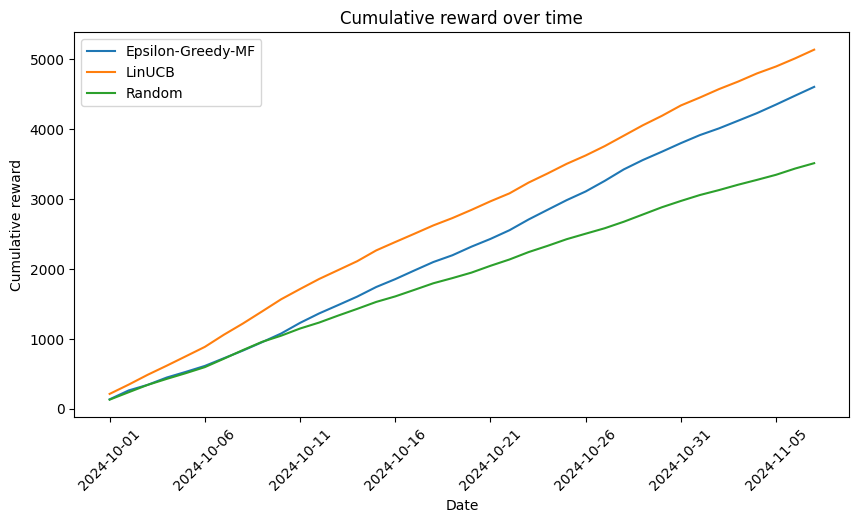

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(10))
for name, group in df.groupby('policy'):
    plt.plot(group.index.get_level_values(1), group.mean(axis=1), label=name)
    plt.fill_between(group.index.get_level_values(1), group.mean(axis=1) - group.std(axis=1), group.mean(axis=1) + group.std(axis=1), alpha=0.2)

plt.title('Cumulative reward over time')
plt.ylabel('Cumulative reward')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.show()